# Economic Concepts Week 2, Assignment 1

In [2]:
StudentName   = "Klein"
StudentNumber = "1234567"
directory_path = r'C:\Users\MarqP\OneDrive - Hogeschool Rotterdam\RMI-2023-24\Block1\MaritimeSupplyChain\Economic Concepts 2023 OP1\week2-GDP\OECD_Data'
file_name = "SNA_TABLE1_ARCHIVE_06092023122529878.csv"
assignment="assignment_1"
myheader = 'Economic Concepts Assignment 1 Report'
mytitle = 'Inventory Investment Analysis'
mysource = 'OECD statistics at stats.oecd.org'

## Inventory investment

The objective of this assignment is to guide you through a reliable and rich source of macroeconomic data and to 
show how much you can learn from it by simply plotting the data and making some straightforward calculations.


Please follow the instructions carefully: it is important that you use the correct data and make correct 
computations.

• Consult the Excel file on BrightSpace to see which country you need to make the assignment for.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fpdf import FPDF
import os

## Create the function process_dataframe(df)  
The provided code snippet serves to manipulate a DataFrame called 'df' with the goal of creating a new DataFrame 'df_new' that retains specific columns, compacts the DataFrame's index, and removes duplicate rows based on a particular column.

Then reshape and prepare a DataFrame named 'df_pivot' for analysis by pivoting df, renaming columns, and resetting the index.
Finally, perform data operations on the DataFrames 'df_new' and 'df_pivot,' with the ultimate goal of merging them based on the 'Year' column and calculating the inventory investment as a percentage of GDP.

In [4]:
def process_dataframe(df):
    # Create a new DataFrame 'df_new'
    selected_columns = ['LOCATION', 'Country', 'Year']
    df_new = df[selected_columns]
    # Reset the index to compact the DataFrame
    df_new.reset_index(drop=True, inplace=True)
    # Drop duplicates based on 'Year'
    df_new = df_new.drop_duplicates(subset='Year', keep='first')
    
    # Pivot the DataFrame to separate "Inventory" and "GDP" columns
    df_pivot = df.pivot(index='Year', columns='Transaction', values='Value')
    # Rename the columns to match your desired column names
    df_pivot = df_pivot.rename(columns={'Changes in inventories': 'Inventory', 'Gross domestic product (expenditure approach)': 'GDP'})
    # Reset the index to make "Year" a regular column
    df_pivot.reset_index(inplace=True)
    
    # Merge the DataFrames df_new and df_pivot on 'Year'
    merged_df = df_new.merge(df_pivot, on=['Year'])
    # Compute inventory investment as a percentage of GDP
    merged_df['Inv_Perc_GDP'] = (merged_df['Inventory'] / merged_df['GDP']) * 100
    merged_df = merged_df.dropna(subset=['Inv_Perc_GDP'])
    return merged_df


### Function to Calculate the statistics

In [17]:
def calculate_and_display_stats(this_df):
    # Compute statistics
    max_inventory_investment = this_df['Inv_Perc_GDP'].max()
    min_inventory_investment = this_df['Inv_Perc_GDP'].min()
    mean_inventory_investment = this_df['Inv_Perc_GDP'].mean()
    std_dev_inventory_investment = this_df['Inv_Perc_GDP'].std()

    # Display the results
    print(f"Max Inventory Investment as Percentage of GDP: {max_inventory_investment:.2f}")
    print(f"Min Inventory Investment as Percentage of GDP: {min_inventory_investment:.2f}")
    print(f"Mean Inventory Investment as Percentage of GDP: {mean_inventory_investment:.2f}")
    print(f"Standard Deviation of Inventory Investment as Percentage of GDP: {std_dev_inventory_investment:.2f}")
    print("")
    print(f"It's important to consider the context of each year to interpret these values effectively. For instance, negative percentages may indicate destocking or economic challenges, while positive percentages could imply inventory buildup or economic expansion.")

In [6]:
# Step 1: Load the CSV file
csv_file_path = os.path.join(directory_path, file_name)
df = pd.read_csv(csv_file_path)
#print(df)
# 'Gross domestic product (expenditure approach)'
unique_transactions = df['Transaction'].unique()
print(unique_transactions,"\n")

merged_df = process_dataframe(df)
mycountry = str(df['Country'].unique())
# Assuming mycountry is a string with '[' and ']' characters around it
mycountry = mycountry.strip('[]')
print(merged_df)

['Changes in inventories' 'Gross domestic product (expenditure approach)'] 

   LOCATION Country  Year   Inventory           GDP  Inv_Perc_GDP
0       KOR   Korea  1990   3732100.0  1.977123e+08      1.887642
1       KOR   Korea  1991   4705400.0  2.388772e+08      1.969799
2       KOR   Korea  1992   2803800.0  2.732674e+08      1.026028
3       KOR   Korea  1993   1895500.0  3.100737e+08      0.611306
4       KOR   Korea  1994   6052900.0  3.660542e+08      1.653553
5       KOR   Korea  1995   5804000.0  4.289271e+08      1.353144
6       KOR   Korea  1996   8253000.0  4.811408e+08      1.715298
7       KOR   Korea  1997   7350800.0  5.303471e+08      1.386036
8       KOR   Korea  1998 -16933100.0  5.244768e+08     -3.228570
9       KOR   Korea  1999   4542300.0  5.768728e+08      0.787401
10      KOR   Korea  2000   7804300.0  6.351846e+08      1.228666
11      KOR   Korea  2001   5376600.0  6.881649e+08      0.781295
12      KOR   Korea  2002   3238700.0  7.619389e+08      0.425060

## Compute statistics

In [15]:
# Call the statistics with your 'merged_df' DataFrame
calculate_and_display_stats(merged_df)

max_inventory_investment = merged_df['Inv_Perc_GDP'].max()
min_inventory_investment = merged_df['Inv_Perc_GDP'].min()
mean_inventory_investment = merged_df['Inv_Perc_GDP'].mean()
std_dev_inventory_investment = merged_df['Inv_Perc_GDP'].std()

Max Inventory Investment as Percentage of GDP: 2.65
Min Inventory Investment as Percentage of GDP: -3.23
Mean Inventory Investment as Percentage of GDP: 0.74
Standard Deviation of Inventory Investment as Percentage of GDP: 1.33

It's important to consider the context of each year to interpret these values effectively. For instance, negative percentages may indicate destocking or economic challenges, while positive percentages could imply inventory buildup or economic expansion.


## Display Graph and Calculations

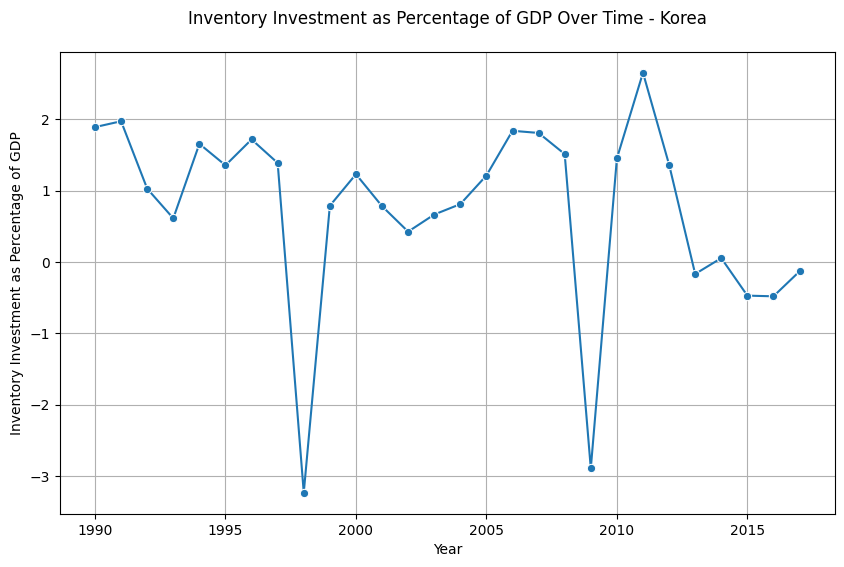

Max Inventory Investment as Percentage of GDP: 2.65
Min Inventory Investment as Percentage of GDP: -3.23
Mean Inventory Investment as Percentage of GDP: 0.74
Standard Deviation of Inventory Investment as Percentage of GDP: 1.33

It's important to consider the context of each year to interpret these values effectively. For instance, negative percentages may indicate destocking or economic challenges, while positive percentages could imply inventory buildup or economic expansion.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df contains the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Inv_Perc_GDP', marker='o')
# plt.title('Inventory Investment as Percentage of GDP Over Time')
title = str(f'Inventory Investment as Percentage of GDP Over Time - {mycountry}')
mycountry = mycountry.strip('\'')
# Set the title of the plot without single quotes
plt.title(title, pad=20)  # The 'pad' parameter adds extra spacing if needed
plt.xlabel('Year')
plt.ylabel('Inventory Investment as Percentage of GDP')
plt.grid(True)
# Adjust the x-axis labels
# plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better readability

# Save the line graph as an image and add it to the PDF
file_name = 'inventory_investment_graph.png'
img_file_name = os.path.join(directory_path, file_name)
plt.savefig(img_file_name, bbox_inches='tight')

plt.show()

calculate_and_display_stats(merged_df)


## Exporting the analysis to a PDF file
This script is designed to create a structured PDF report that combines text, images, and statistical information, making it useful for generating customized reports in various contexts.

In [16]:
# Step 3: Create a PDF Report
class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.page_format = 'A4'
        self.w = 210  # Width (mm)
        self.h = 297  # Height (mm)
        
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, myheader, 0, 1, 'C')
    def footer(self):  # Define a custom PDF class with A4 page size, footer at 1 cm, and 1 cm spacing to footer
        self.set_y(-15)  # 1 cm from the bottom
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page %s' % self.page_no(), 0, 0, 'C')
        
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.set_y(30)  # 3 cm from the top
        self.cell(0, 10, title, 0, 1, 'L')
        # self.ln() #(10)

    def chapter_body(self, body):
        self.multi_cell(0, 3, '\n')
        self.set_font('Arial', '', 12)
        line_height = 3  # 4 mm spacing before/after each line
        self.multi_cell(0, line_height, body)
        self.ln()

    def chapter_body1(self, body):
        self.set_font('Arial', '', 9)
        line_height = 4  # 4 mm spacing before/after each line
        self.multi_cell(0, line_height, body)
        self.multi_cell(0, 2, '\n')
        # self.multi_cell(0, line_height, '\n')
        self.ln()
    
    def chapter_body_small(self, body):
        self.set_font('Arial', '', 6)
        # self.multi_cell(0, 2, '\n')
        self.multi_cell(0, 1, body)
        # self.multi_cell(0, 1, '\n')
        self.ln()

# Initialize PDF ------------------------------------------------------------------------
# Defining a Custom PDF Class (PDF): This script defines a custom PDF class named PDF 
# by inheriting from the FPDF class provided by the PyFPDF library. 
# The custom class is used to structure the PDF document and define how different elements, 
# such as headers, chapter titles, and body text, should be formatted.
# Initializing the PDF Document (pdf): An instance of the custom PDF class is created and named pdf. It's used to initialize the PDF document and add pages to it.
pdf = PDF()
pdf.add_page()

# Add title ----------------------------------------------------------------------------
# Adding a Title (title): The script constructs a title for the report by combining mytitle and mycountry. The chapter_title method is then used to add this title to the PDF.
title = f'{mytitle} - {mycountry}'
pdf.chapter_title(title)

# Add name and student number ----------------------------------------------------------
# Adding Name and Student Number (StudentName and StudentNumber): The student's name and student number are added to the PDF body using the chapter_body method.
pdf.chapter_body(f'Name: {StudentName}\n\nStudent Number: {StudentNumber}')

# Save the line graph as an image and add it to the PDF --------------------------------
# Adding an Image (img_file_name): The script adds an image to the PDF using the image method. The image file is specified by img_file_name, and it's positioned at (x=10) with a width of 190.
pdf.image(img_file_name, x=10, w=190)

# Add statistics -----------------------------------------------------------------------
# Adding Statistical Information: Various statistics related to inventory investment as a percentage of GDP are added to the PDF. Each statistic is added as a separate paragraph in the PDF body using the chapter_body method.
pdf.chapter_body_small(f'\n')
pdf.chapter_body(f'Maximum Inventory Investment (% of GDP): {max_inventory_investment:.2f}')
pdf.chapter_body1(f'This indicates a relatively high level of inventory investment compared to the size of the economy during that year.\n')

pdf.chapter_body(f'Minimum Inventory Investment (% of GDP): {min_inventory_investment:.2f}')
pdf.chapter_body1(f'This suggests that during that year, the value of inventory decreased by a substantial percentage compared to the GDP, which could be indicative of economic challenges or adjustments.\n')

pdf.chapter_body(f'Mean Inventory Investment (% of GDP): {mean_inventory_investment:.2f}')
pdf.chapter_body1(f'This indicates that, on average, the value of inventory investments is a relatively small proportion of the country\'s GDP.\n')

pdf.chapter_body(f'Standard Deviation Inventory Investment (% of GDP): {std_dev_inventory_investment:.2f}')
pdf.chapter_body1(f'Some years have higher-than-average inventory investments, while others have lower values.\n')

pdf.chapter_body1(f'\n')
pdf.chapter_body1(f'Source: {mysource}\n')

# Save the PDF -------------------------------------------------------------------------
# Saving the PDF: The script specifies a file name for the PDF based on the student's number, name, and the assignment name. It then uses the output method to save the PDF to a file path specified by pdf_file_path.
file_name = f'{StudentNumber}-{StudentName}-{assignment}.pdf'
pdf_file_name = os.path.join(directory_path, file_name)

pdf_file_path = pdf_file_name
pdf.output(pdf_file_path)

# Display success message --------------------------------------------------------------
# Displaying a Success Message: Finally, the script prints a success message indicating that the PDF report has been created successfully, with the name of the generated PDF file.
print(f'PDF report "{pdf_file_name}" created successfully.')

PDF report "C:\Users\MarqP\OneDrive - Hogeschool Rotterdam\RMI-2023-24\Block1\MaritimeSupplyChain\Economic Concepts 2023 OP1\week2-GDP\OECD_Data\1234567-Klein-assignment_1.pdf" created successfully.
